In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [18]:
train.head(9)
#train.columns   # Briefly check the data set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [19]:
# As data description said, some "Na" means "None"
train["PoolQC"]      = train["PoolQC"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Alley"]       = train["Alley"].fillna("None")
train["Fence"]       = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")

# Utilities" is useless, because its values are the same
train = train.drop(["Utilities"],axis=1)

# Some columns without values are most likely meaning "None"
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


# Do the same to the test set
# As data description said, some "Na" means "None"
test["PoolQC"]      = test["PoolQC"].fillna("None")
test["MiscFeature"] = test["MiscFeature"].fillna("None")
test["Alley"]       = test["Alley"].fillna("None")
test["Fence"]       = test["Fence"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")

# Utilities" is useless, because its values are the same
test = test.drop(["Utilities"],axis=1)

# Some columns without values are most likely meaning "None"
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[col] = test[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna('None')
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [20]:
# But testing set still has some missing value
miss_list = test.columns[test.isnull().any()]

# I am planing to fill them with mode value of training set
for i in miss_list:
    try:
        test[i] = test[i].fillna(train[i].mode()[0])
    except:
        test[i] = test[i].fillna(train[i].max())

In [21]:
## Missing value first
total   = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
mess_column  = missing_data.index[missing_data.Total >= 90]
train = train.drop(mess_column, axis=1)
train = train.dropna(axis=0)

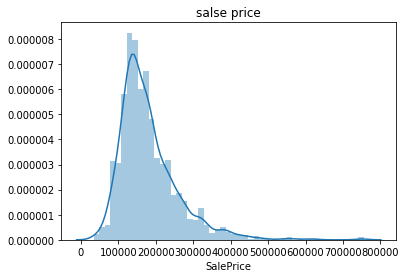

Skewness: 1.881943
Kurtosis: 6.529263


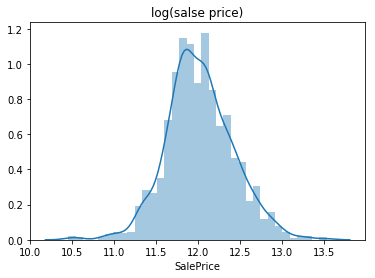

Skewness: 0.121318
Kurtosis: 0.806928


In [22]:
# Analyze the response
train['SalePrice'].describe()
# histogram
sns.distplot(train['SalePrice'])  
plt.title("salse price")
plt.show()                                           # seems a littile skewed
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

# Adding logrithm to response
train["SalePrice"] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'])
plt.title("log(salse price)")
plt.show()                                          #seems normal
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [23]:
# Checking Missing Value
train.info()

# Get numerical data
train_numeric = train._get_numeric_data()
train_numeric.info()

# Get the rest of the data
num_list = train_numeric.columns.tolist()
rest_list = train.columns.tolist()
rest_list = [i for i in rest_list if i not in num_list]

train_rest = train[rest_list]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non

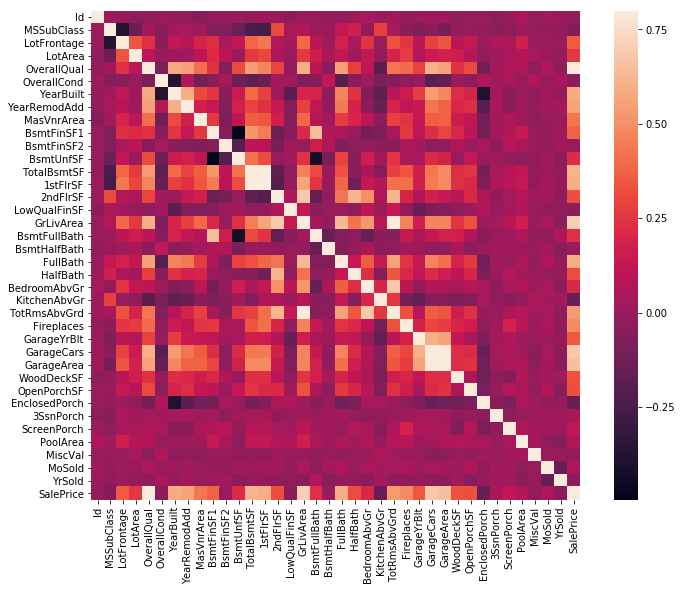

In [25]:
#let's look at the correlation between vatiables
corrmat = train_numeric.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True); 
# Seems like there is a multicollinearity problem

In [26]:
col_corr = corrmat.columns
multico = dict()
for i in col_corr:
    for j in corrmat[i][corrmat[i] > 0.8 ].index:
        if i != j and i in multico.keys():
            multico[i] = multico[i].append(j)
        else:
            if i != j and j not in multico.keys():
                multico[i] = [j]
    
    for j in corrmat[i][corrmat[i] < -0.8 ].index:
        if i != j & multico[i]:
            multico[i] = multico[i].append(j)
        else:
            if i != j :
                multico[i] = [j]

In [27]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['OverallCond'] = train['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['OverallCond'] = test['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [28]:
cols = ["Street", "MSZoning", "Alley", "LotShape", "LandContour", "PoolQC", "Fence", "MasVnrType",
      "SaleType", "SaleCondition", "YrSold", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
      "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
      "SaleCondition", "SaleType", "Fence", "MiscFeature", "PoolQC", "KitchenQual", "Functional",
      "GarageType", "GarageQual", "BsmtCond","BsmtQual", "Heating", "HeatingQC", "CentralAir",
      "Electrical", "ExterCond", "ExterQual", "Foundation", "BsmtExposure", "YrSold", "MoSold",
      "MSSubClass", "OverallCond", "BsmtFinType1", "FireplaceQu", "PavedDrive", "BsmtFinType1",
       "BsmtFinType2","GarageFinish", "GarageCond"]

In [29]:
from sklearn.preprocessing import LabelEncoder
column_name = []
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values) + list(test[c].values)) 
    for i in lbl.classes_:
        name = str(c) + "_" + str(i)
        column_name.append(name)
    #print(c)
    train[c] = lbl.transform(list(train[c].values))
    test[c] = lbl.transform(list(test[c].values))

In [30]:
train.shape
y = train["SalePrice"]
train = train.drop("SalePrice",axis=1)

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error')
enc.fit(pd.concat([train[cols],test[cols]]))
train = train.reset_index()
test  = test.reset_index()
train[column_name] = pd.DataFrame(enc.transform(train[cols]).toarray(), columns = column_name)
test[column_name]  = pd.DataFrame(enc.transform(test[cols]).toarray(), columns = column_name)
#print(enc.get_feature_names())
train = train.drop(cols, axis=1)
test = test.drop(cols, axis=1)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=4)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=120)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test  = pca.transform(X_test)
test    =  pca.transform(test)

## Sklearn model selection

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [23]:
compare_dic = {}
# Linear Regression
reg1 = LinearRegression()
# Lasso model
parameters = {"alpha" : [i/100 for i in range(0,80,5)]}
reg2 = linear_model.Lasso()
Lasso = GridSearchCV(reg2, parameters, cv = 5)
# Ridge Regression
parameters = {"alpha" : [i/100 for i in range(0,80,5)]}
reg3 = Ridge()
Ridge = GridSearchCV(reg3, parameters, cv = 5)
#Elastic Net
parameters = {"alpha" : [i/100 for i in range(0,80,5)], "l1_ratio":[i/100 for i in range(0,80,5)]}
reg4 = ElasticNet(random_state=0)
Ela = GridSearchCV(reg4, parameters, cv = 5)
#Desition Tree
parameters = {"max_depth" : [30,50,80,15,20,25]}
dt   = DecisionTreeRegressor()
model_dt = GridSearchCV(dt, parameters, cv = 5)
#Random Forest
parameters = {"n_estimators" : [10,50,100,300,350], "max_depth" : [30,56,70,85,10]}
rf   = RandomForestRegressor(random_state=0)
model_RF = GridSearchCV(rf, parameters, cv = 5)

model_list = [reg1, Lasso, Ridge, Ela, model_dt, model_RF]
model_name = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net", "Decision Tree", "Random Forest"]
for i in range(len(model_list)):
    model = model_list[i]
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    compare_dic[model_name[i]] = mean_squared_error(y_test, pred, )
    print(metrics.mean_squared_error(y_test, pred))

0.02534540302509131
0.025345403025089246
0.02536852812445422
0.027184732099525762
0.06776032585760612
0.028809725683075067


## H2O

In [34]:
import h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,25 mins 47 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_gaozhiping_ajfodx
H2O cluster total nodes:,1
H2O cluster free memory:,1.611 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [35]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.frame import H2OFrame
import time

### H2OGeneralizedLinearEstimator model

In [36]:
# X_train, X_test, y_train, y_test

x_name = [str(i) for i in range(120)]
y_name = 'SalePrice'

train_h = pd.DataFrame(X_train, columns=x_name).copy()
train_h['SalePrice'] = y_train
train_h = H2OFrame(train_h)

valid_h = pd.DataFrame(X_test, columns=x_name).copy()
valid_h['SalePrice'] = [float(i) for i in y_test]
valid_h = H2OFrame(valid_h)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [268]:
start_time = time.time()
glm_model = H2OGeneralizedLinearEstimator(family= "gaussian",lambda_ = 0)
glm_model.train(x_name, y_name, training_frame= train_h)
print("--- %s seconds ---" % (time.time() - start_time))

glm Model Build progress: |███████████████████████████████████████████████| 100%
--- 0.27477025985717773 seconds ---


In [269]:
glm_model.show()

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1561591121775_1961


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.1344185239118812
RMSE: 0.36663131878207184
MAE: 0.2850332839140359
RMSLE: 0.02818312085086203
R^2: 0.2047279874238166
Mean Residual Deviance: 0.1344185239118812
Null degrees of freedom: 647
Residual degrees of freedom: 527
Null deviance: 109.52630309826743
Residual deviance: 87.103203494899
AIC: 782.5398612183282
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-06-26 17:26:20,0.000 sec,0,109.5262987,0.1121047


In [270]:
glm_model.model_performance(valid_h).mse()

0.20931177795716363

In [271]:
pred = glm_model.predict(H2OFrame(pd.DataFrame(X_test, columns=x))).as_data_frame()
print(metrics.mean_squared_error(y_test, pred.predict))

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
0.2093117578387039


In [305]:
glm_model.coef()

{'Intercept': 12.021007227146663,
 '0': -4.3149589497984766e-07,
 '1': -3.648211980318325e-05,
 '2': 4.0884515794006095e-05,
 '3': -1.8479433673806464e-05,
 '4': -4.851819938904061e-05,
 '5': -2.8897542276625755e-05,
 '6': 9.086635707671087e-05,
 '7': -4.175763190191141e-05,
 '8': 7.918558277122044e-05,
 '9': -9.958297936799302e-05,
 '10': -0.0001825663991892302,
 '11': -8.881079228466454e-06,
 '12': -0.00019546685862441537,
 '13': 0.0009015071816325006,
 '14': 0.00010943341051724787,
 '15': 0.00022265688825315422,
 '16': 0.00023034338002216403,
 '17': 0.0007862815921356206,
 '18': 0.00031491782506056675,
 '19': -0.00032124965354930773,
 '20': 0.00033027860952842544,
 '21': -0.013065032902180423,
 '22': 0.02442201470482555,
 '23': 0.01805647624698519,
 '24': -0.015457937330641212,
 '25': 0.011806252582779505,
 '26': -0.02049030650856075,
 '27': 0.022643893029868623,
 '28': -0.0071058359206975326,
 '29': -0.03045182314432478,
 '30': -0.07655546415258342,
 '31': -0.011018585003453098,
 '

In [274]:
start_time = time.time()
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

# Training set error
print(metrics.mean_squared_error(y_train, reg1.predict(X_train)))

# Validating set error
pred = reg1.predict(X_test)
print(metrics.mean_squared_error(y_test, pred))

--- 0.008794069290161133 seconds ---
0.014299599776796564
0.025623357446509426


In [303]:
reg1.coef_
#reg1.intercept_

array([ 8.87238853e-06,  4.41417764e-04,  2.49026640e-05,  1.02200137e-05,
        1.22349326e-05, -8.87831495e-05, -2.41669178e-05, -1.28687715e-04,
       -8.66826800e-05,  1.83309253e-04,  3.67050871e-04,  1.70988907e-04,
       -5.41605421e-04, -2.93593613e-04, -3.58947599e-04, -1.13015464e-05,
        1.47654302e-04,  4.92085582e-04, -4.08423448e-03,  1.28044724e-03,
        1.59593462e-03, -3.47142582e-02,  4.65971931e-02, -7.07477806e-02,
        1.25051151e-02,  2.48334669e-03, -1.26419263e-02,  7.75653744e-03,
       -1.88265241e-02,  1.33759070e-02, -1.11856674e-02, -2.23909297e-02,
        2.16528741e-03,  2.26015763e-02,  1.59327037e-02,  7.05366748e-03,
       -3.18965915e-02, -3.14515906e-02,  1.07764781e-02, -1.89987201e-05,
       -1.22466410e-02, -3.74846217e-02, -2.62495848e-02, -5.39753515e-03,
       -2.27869420e-02,  1.24991428e-02,  1.32531219e-02, -1.13248132e-02,
        3.11431130e-02, -9.07859025e-03,  1.28129134e-02,  2.69801373e-02,
       -6.85670218e-03, -

In [161]:
max_lambda = 0
for i in [i/100 for i in range(0,10)]:
    max_lambda = i
    try:
        glm_model = H2OGeneralizedLinearEstimator(family= "gaussian", lambda_ = i)
        glm_model.train(x, y, training_frame= train_h)
        pred = glm_model.predict(H2OFrame(pd.DataFrame(X_test, columns=x))).as_data_frame()
    except:
        print(max_lambda)
        break

glm Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
glm Model Build progress: |█

### H2OGridSearch model

In [276]:
from h2o.grid.grid_search import H2OGridSearch

In [295]:
# H2O GridSearch with Random Forest
start_time = time.time()
gbm_params1 = {'lambda': [i/100 for i in range(0,80,5)]}



gbm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)

gbm_grid1.train(x=x_name, y=y_name,
                training_frame=train_h,
                family= "gaussian",
                alpha = 1,
                nfolds = 5,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='mse', decreasing=True)
print("--- %s seconds ---" % (time.time() - start_time))
gbm_gridperf1

# Grab the top GBM model, chosen by validation AUC
best_gbm1 = gbm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf1 = best_gbm1.model_performance(valid_h)

best_gbm_perf1.mse()

glm Grid Build progress: |████████████████████████████████████████████████| 100%
--- 1.8272628784179688 seconds ---


0.20931177795716363

### GBM with CV, Early Stopping and Full Grid Search

In [38]:
# import Grid Search
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [3]:
# define the criteria for full grid search
search_criteria = {'strategy': "Cartesian"}

In [4]:
# define the range of hyper-parameters for grid search
hyper_params = {'sample_rate': [0.7, 0.8, 0.9],
                'col_sample_rate': [0.7, 0.8, 0.9]}

In [39]:
# Set up GBM grid search
# Add a seed for reproducibility
gbm_full_grid = H2OGridSearch(
                    H2OGradientBoostingEstimator(
                        model_id = 'gbm_full_grid', 
                        seed = 1234,
                        ntrees = 10000,   
                        nfolds = 5,
                        stopping_metric = 'mse', 
                        stopping_rounds = 15,     
                        score_tree_interval = 1),
                    search_criteria = search_criteria, # full grid search
                    hyper_params = hyper_params)

In [41]:
# Use .train() to start the grid search
gbm_full_grid.train(x_name, y_name, 
                    training_frame = train_h)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [42]:
# Sort and show the grid search results
gbm_full_grid_sorted = gbm_full_grid.get_grid(sort_by='mse', decreasing=False)
print(gbm_full_grid_sorted)

    col_sample_rate sample_rate  \
0               0.7         0.9   
1               0.7         0.8   
2               0.9         0.9   
3               0.8         0.9   
4               0.8         0.8   
5               0.7         0.7   
6               0.8         0.7   
7               0.9         0.8   
8               0.9         0.7   

                                                               model_ids  \
0  Grid_GBM_Key_Frame__upload_81c8b976fa823265166e5cc02dcf4fcf.hex_mo...   
1  Grid_GBM_Key_Frame__upload_81c8b976fa823265166e5cc02dcf4fcf.hex_mo...   
2  Grid_GBM_Key_Frame__upload_81c8b976fa823265166e5cc02dcf4fcf.hex_mo...   
3  Grid_GBM_Key_Frame__upload_81c8b976fa823265166e5cc02dcf4fcf.hex_mo...   
4  Grid_GBM_Key_Frame__upload_81c8b976fa823265166e5cc02dcf4fcf.hex_mo...   
5  Grid_GBM_Key_Frame__upload_81c8b976fa823265166e5cc02dcf4fcf.hex_mo...   
6  Grid_GBM_Key_Frame__upload_81c8b976fa823265166e5cc02dcf4fcf.hex_mo...   
7  Grid_GBM_Key_Frame__upload_81c8b976fa8

In [43]:
# Extract the best model from full grid search
best_model_id = gbm_full_grid_sorted.model_ids[0]
best_gbm_from_full_grid = h2o.get_model(best_model_id)
best_gbm_from_full_grid.summary()

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,31.0,31.0,7846.0,5.0,5.0,5.0,8.0,24.0,15.548388


In [45]:
# Check the model performance on test dataset
best_gbm_from_full_grid.model_performance(valid_h)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.17130285768259637
RMSE: 0.4138874939915392
MAE: 0.3267186366679917
RMSLE: 0.03187107852153576
Mean Residual Deviance: 0.17130285768259637


### H2OAutoMl model

In [297]:
from h2o.automl import H2OAutoML

In [306]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x_name, y=y_name, training_frame=train_h)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [307]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_20190626_174822_model_1,0.16756,0.409341,0.16756,0.315777,0.0314337
GBM_grid_1_AutoML_20190626_174822_model_2,0.168648,0.410667,0.168648,0.317361,0.0315332
StackedEnsemble_BestOfFamily_AutoML_20190626_174822,0.169028,0.41113,0.169028,0.317067,0.0315738
GBM_grid_1_AutoML_20190626_174822_model_4,0.169138,0.411264,0.169138,0.318047,0.0315792
GBM_grid_1_AutoML_20190626_174822_model_5,0.169138,0.411264,0.169138,0.317689,0.0315785
GLM_grid_1_AutoML_20190626_180836_model_1,0.169163,0.411294,0.169163,0.318009,0.0315814
GLM_grid_1_AutoML_20190626_174822_model_1,0.169163,0.411294,0.169163,0.318009,0.0315814
GBM_grid_1_AutoML_20190626_180836_model_1,0.169232,0.411378,0.169232,0.317678,0.0315871
StackedEnsemble_AllModels_AutoML_20190626_174822,0.169483,0.411683,0.169483,0.316729,0.031614
GBM_5_AutoML_20190626_180836,0.173635,0.416695,0.173635,0.32245,0.0320022


In [308]:
pred = aml.predict(H2OFrame(pd.DataFrame(X_test, columns=x))).as_data_frame()
print(metrics.mean_squared_error(y_test, pred.predict))

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
0.15307306661201137


In [309]:
h2o.shutdown()

[WARNING] in <ipython-input-309-1edf85295eae> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_9bb3 closed.
